### Web data retrieval

In [ ]:
import requests
import pandas as pd
from google.colab import files

In [ ]:
#Let's download the data from ETCIO website. In this case, news articles will be from 'Financial Services' category
url = 'https://cio.economictimes.indiatimes.com/tag/financial+services'

Download HTML data

In [ ]:
#Download the data from Website
data = requests.get(url).text

Data Cleaning - We can use Beautiful Soup package to clean Web data

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
pip install lxml

In [ ]:
soup = BeautifulSoup(data, "lxml")

In [ ]:
finance = pd.DataFrame()

In [ ]:
h = []
s = []
u = []

for descBx in soup.find_all('div',class_='descBx'):
  try:
    headline = descBx.h3.a.text
  except:
    pass
  h.append(headline)

  try:
     summary = descBx.p.text
  except:
    pass
  s.append(summary)
  
  
  try:
    url = descBx.a.attrs['href']
  except:
    pass
  u.append(url)
  
finance['Headline'] = h
finance['Summary'] = s
finance['Article URL'] = u

In [ ]:
finance.head()

,Headline,Summary,Article URL
0,Data-driven culture is enabling Lendingkart to...,"With the use of machine learning techniques, f...",https://cio.economictimes.indiatimes.com/news/...
1,Madhu Malhotra joins Edelweiss General Insuran...,"Prior to joining Edelweiss General Insurance, ...",https://cio.economictimes.indiatimes.com/news/...
2,Why BharatPe is bullish about chaos,The payments firm is adopting Chaos engineerin...,https://cio.economictimes.indiatimes.com/news/...
3,View: The future of Neobanks in India,A hybrid approach involving both digital and t...,https://cio.economictimes.indiatimes.com/news/...
4,"Fintech firms will soon process NEFT, RTGS pay...",RBI also proposes making all mobile wallets co...,https://cio.economictimes.indiatimes.com/news/...


In [ ]:
finance = finance.drop_duplicates('Headline', keep='first')

In [ ]:
#Adding an extra column to the dataframe for collecting the text

collect = []

for x in finance['Article URL']:
  #Getting Inside Page

  #Loading URL
  url_article = x

  #Download the data from the inside page
  data_inside = requests.get(url_article).text

  #Parse the data using Beautiful Soup
  soup_inside = BeautifulSoup(data_inside, "lxml")

  #Getting just the article content from the page
  article_text = soup_inside.find('div', class_='section1')
  text = article_text.text
  text.encode("ascii", "ignore")
  text.encode("utf-8", "ignore")
  collect.append(text)

#Made a new column in data and added the text to that
finance['Article'] = collect 

In [ ]:
#Convert DataFrame to CSV
finance.to_csv("ETCIO_finance.csv")

#Download the file to the laptop
files.download('ETCIO_finance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Need to solve two aspects:
1. How to scrape the full page after this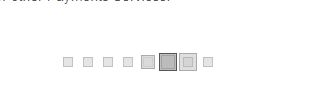

2. How to solve the issue of special characters like this â€™

In [ ]:
Need to solve two aspects:


In [ ]:
test = "U GRO Capitalâ€™s underwriting framework is based on the premise that a borrowerâ€™s ability to"

In [ ]:
test.encode("utf-32")
print(test)

U GRO Capitalâ€™s underwriting framework is based on the premise that a borrowerâ€™s ability to
